### Introduction
Have you ever wondered how Netflix suggests movies to you based on the movies you have already watched? Or how does an e-commerce websites display options such as "Frequently Bought Together"? They may look relatively simple options but behind the scenes, a complex statistical algorithm executes in order to predict these recommendations. Such systems are called Recommender Systems, Recommendation Systems, or Recommendation Engines. A Recommender System is one of the most famous applications of data science and machine learning.

A Recommender System employs a statistical algorithm that seeks to predict users' ratings for a particular entity, based on the similarity between the entities or similarity between the users that previously rated those entities. The intuition is that similar types of users are likely to have similar ratings for a set of entities.

Currently, many of the big tech companies out there use a Recommender System in one way or another. You can find them anywhere from Amazon (product recommendations) to YouTube (video recommendations) to Facebook (friend recommendations). The ability to recommend relevant products or services to users can be a huge boost for a company, which is why it's so common to find this technique employed in so many sites.

### Types of Recommender Systems
There are two major approaches to build recommender systems: Content-Based Filtering and Collaborative Filtering:

### Content-Based Filtering
In content-based filtering, the similarity between different products is calculated on the basis of the attributes of the products. For instance, in a content-based movie recommender system, the similarity between the movies is calculated on the basis of genres, the actors in the movie, the director of the movie, etc.

### Collaborative Filtering
Collaborative filtering leverages the power of the crowd. The intuition behind collaborative filtering is that if a user A likes products X and Y, and if another user B likes product X, there is a fair bit of chance that he will like the product Y as well.

Take the example of a movie recommender system. Suppose a huge number of users have assigned the same ratings to movies X and Y. A new user comes who has assigned the same rating to movie X but hasn't watched movie Y yet. Collaborative filtering system will recommend him the movie Y.

In [25]:
import numpy as np
import pandas as pd

ratings_data = pd.read_csv("ratings_small.csv")
ratings_data.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


There is one problem with this dataset. It contains the IDs of the movies but not their titles. We'll need movie names for the movies we're recommending. The movie names are stored in the "movies.csv" file. Let's import the file and see the data it contains. Execute the following script:

In [27]:
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [31]:
movie_data.groupby('title')['rating'].mean().head()

title
'Hellboy': The Seeds of Creation (2004)    2.000000
'Round Midnight (1986)                     2.250000
'Salem's Lot (2004)                        3.500000
'Til There Was You (1997)                  2.625000
'burbs, The (1989)                         3.052632
Name: rating, dtype: float64

In [34]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Unvanquished, The (Aparajito) (1957)    5.0
War Room (2015)                         5.0
Walker (1987)                           5.0
Misfits, The (1961)                     5.0
Something Borrowed (2011)               5.0
Name: rating, dtype: float64

The movies have now been sorted according to the ascending order of their ratings. However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's now plot the total number of ratings for a movie:

In [36]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

Now you can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

Execute the following script to create ratings_mean_count dataframe and first add the average rating of each movie to this dataframe:



In [37]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

Next, we need to add the number of ratings for a movie to the ratings_mean_count dataframe. Execute the following script to do so:



In [38]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [39]:
##Now let's take a look at our newly created dataframe.

ratings_mean_count.head()
##The output looks like this:

,rating,rating_counts
title,,
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Round Midnight (1986),2.250000,2
'Salem's Lot (2004),3.500000,1
'Til There Was You (1997),2.625000,4
"'burbs, The (1989)",3.052632,19


You can see movie title, along with the average rating and number of ratings for the movie.

Let's plot a histogram for the number of ratings represented by the "rating_counts" column in the above dataframe. Execute the following script:

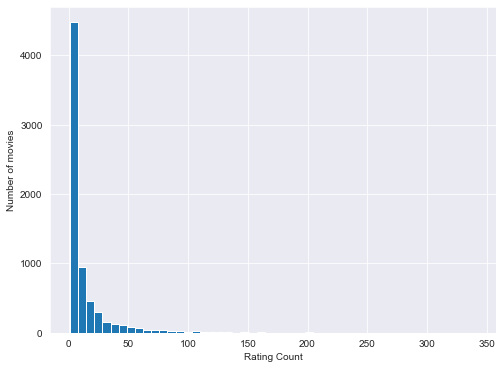

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.xlabel("Rating Count")
plt.ylabel("Number of movies")
ratings_mean_count['rating_counts'].hist(bins=50)

From the output, you can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

Now we'll plot a histogram for average ratings. Here is the code to do so:



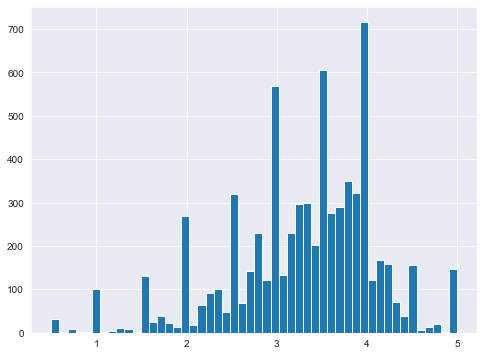

In [45]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

You can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.

Earlier, we said that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

<Figure size 576x432 with 0 Axes>

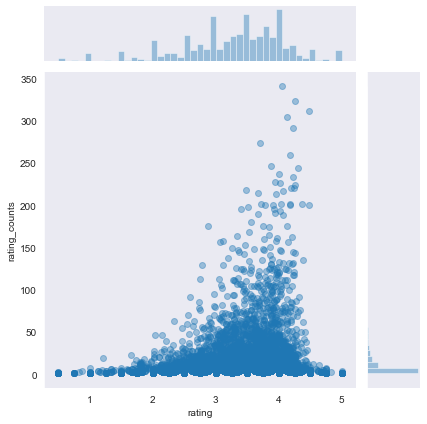

In [46]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

## Finding Similarities Between Movies
We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between movies.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

To create the matrix of movie titles and corresponding user ratings, execute the following script:

In [47]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [48]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']


In [49]:
## The above script will return a Pandas series. Let's see how it looks.

forrest_gump_ratings.head()

userId
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:


In [50]:

movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()


C:\Users\ashwinku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ashwinku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422
10 (1979),0.474420


In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

In [53]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
World's Greatest Dad (2009),1.0
"Browning Version, The (1994)",1.0
Rosetta (1999),1.0
Bugsy (1991),1.0
Pickpocket (1959),1.0
After the Sunset (2004),1.0
Before the Rain (Pred dozhdot) (1994),1.0
"Woman Under the Influence, A (1974)",1.0
"Toy, The (1982)",1.0


From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:



In [54]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13
10 (1979),0.474420,5


In [56]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>20].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,341
Diner (1982),0.815796,22
October Sky (1999),0.814027,35
Coyote Ugly (2000),0.786340,27
"Devil Wears Prada, The (2006)",0.779763,21


Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.